In [1]:
import pandas as pd

train = pd.read_excel('Data/train.xlsx')
test = pd.read_excel('Data/test.xlsx')

In [2]:
print(test.shape)
test.head()

(47883, 224)


,ID,PROSPECT_FLAG,GENDER,AGE,RELATIONSHIP,DEPENDENTS_NUM,EDUCATION_TYPE,REMOV_REG,PREFERRED_LANGUAGE,SALARY,...,VERIF_MOBILE_SIGN,VERIF_MOBILE_SIGN_3M,VERIF_DAYS_DIFF,CONFIRM_MOBILE_SIGN,KDN_NEW_TOTAL,KDN_NEW_PURE,KDN_NEW_DEDUCTIONS,REFIN_ACT_FLAG,MONTHLY_PMT_NOW,DAYS_FROM_LAST_TB_CALL
0,1,0,F,40,3,0.0,5,0,RUS,100000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,F,45,2,0.0,3,0,KAZ,100000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,0,F,35,2,NaN,3,0,RUS,200000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,0,F,36,1,0.0,5,0,RUS,100000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,0,F,56,2,0.0,5,0,RUS,160000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(train.shape)
train.head()

(62123, 225)


,ID,TARGET,PROSPECT_FLAG,GENDER,AGE,RELATIONSHIP,DEPENDENTS_NUM,EDUCATION_TYPE,REMOV_REG,PREFERRED_LANGUAGE,...,VERIF_MOBILE_SIGN,VERIF_MOBILE_SIGN_3M,VERIF_DAYS_DIFF,CONFIRM_MOBILE_SIGN,KDN_NEW_TOTAL,KDN_NEW_PURE,KDN_NEW_DEDUCTIONS,REFIN_ACT_FLAG,MONTHLY_PMT_NOW,DAYS_FROM_LAST_TB_CALL
0,6,1,0,F,37,1,0.0,3,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,1,0,F,42,2,0.0,5,0,KAZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13,1,0,F,44,2,NaN,5,0,RUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27,1,0,F,51,-1,NaN,-1,0,RUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,64,1,0,F,54,3,0.0,5,0,RUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Let's explore the target variable</b>

We can check the proportion of 1's and 0's in the dataset first

In [4]:
print('Number of zeros:',len(train[train['TARGET']==0]))
print('Number of ones:',len(train[train['TARGET']==1]))

Number of zeros: 39855
Number of ones: 22268


<b>Drop columns with the same value and duplicates. Count target variable proportion again</b>

We can see that class 1 was oversampled in our train set. We remove duplicate rows for now. Class 0 remained the same.

In [5]:
cols_to_drop = [col for col in train.columns if train[col].nunique(dropna=False) == 1]
train.drop(cols_to_drop, axis=1, inplace=True)
train = train[~train.duplicated()]

test.drop(cols_to_drop, axis=1, inplace=True)
print('Number of zeros:',len(train[train['TARGET']==0]))
print('Number of ones:',len(train[train['TARGET']==1]))
print('Ratio:',len(train[train['TARGET']==1])/train.shape[0])

Number of zeros: 39855
Number of ones: 6851
Ratio: 0.1466835096133259


<b>Let's deal with missing values</b>

In [6]:
def get_percentage_missing(series):
    """ Calculates percentage of NaN values in DataFrame
    :param series: Pandas DataFrame object
    :return: float
    """
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 2)


In [7]:
# Iterate over columns in DataFrame and delete those with where >30% of the values are null/NaN
for name, values in train.iteritems():
    if get_percentage_missing(train[name]) > 0.3:
        print("Deleting Column %r: " % (name) )
        train.drop(name, axis=1, inplace=True)
        test.drop(name, axis=1, inplace=True)

Deleting Column 'DAYS_FRM_LAST_ACTL_KN_CTR_OPEN': 
Deleting Column 'DAYS_OFF_EKT_ACTUAL_CONTR_QTY': 
Deleting Column 'DAYS_ON_EKT_ACTUAL_CONTR_QTY': 
Deleting Column 'DAYS_AVTO_ACTUAL_CONTR_QTY': 
Deleting Column 'DAYS_KK_ACTUAL_CONTR_QTY': 
Deleting Column 'DAYS_TILL_NEXT_CR_CLOSE': 
Deleting Column 'KK_L30D_TR_QTY': 
Deleting Column 'KK_L30D_TR_AMT': 
Deleting Column 'KK_L30D_NON_CASH_TR_QTY': 
Deleting Column 'KK_L30D_NON_CASH_TR_AMT': 
Deleting Column 'KK_L90D_TR_QTY': 
Deleting Column 'KK_L90D_TR_AMT': 
Deleting Column 'KK_L90D_NON_CASH_TR_QTY': 
Deleting Column 'KK_L90D_NON_CASH_TR_AMT': 
Deleting Column 'DAYS_FRM_LST_KK_NO_CASH_TR_90D': 
Deleting Column 'KASPI_GOLD_L30D_TR_QTY': 
Deleting Column 'KASPI_GOLD_L30D_TR_AMT': 
Deleting Column 'KASPI_GOLD_L30D_REFILL_TR_AMT': 
Deleting Column 'KASPI_GLD_L30D_NON_CASH_TR_QTY': 
Deleting Column 'KASPI_GLD_L30D_NON_CASH_TR_AMT': 
Deleting Column 'KASPI_GOLD_L90D_TR_QTY': 
Deleting Column 'KASPI_GOLD_L90D_TR_AMT': 
Deleting Column 'KASPI_

<b> Let's export df to csv and eyeball data

In [8]:
train.to_csv('filtered_data.csv')
must_categorical = ['GENDER', 'RELATIONSHIP', 'EDUCATION_TYPE', 'PREFERRED_LANGUAGE', 'STATUS_PKB']
maybe_categorical = ['IS_EXISTS_PMT_KASPIKZ_LAST3', 'ACTUAL_KASPI_GOLD_FLAG', 'ZP_KASPI_GOLD_FLAG', 'IS_EXISTS_DEP', 'BONUS_OPERATIONS_FLAG']
geo_categorical = ['FST_CONTRACT_CITY', 'LAST_CONTRACT_CITY', 'PROFILE_CITY']

In [9]:
from sklearn.preprocessing import LabelEncoder
print("process categorical columns ...")

for col in must_categorical:
    lbl = LabelEncoder()
    lbl.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
    train[col] = lbl.transform(list(train[col].values.astype('str')))
    test[col] = lbl.transform(list(test[col].values.astype('str')))

process categorical columns ...


In [10]:
to_remove_cols = ['DATE_LST_PKB_RQST', 'ID']
train.drop(to_remove_cols, axis=1, inplace=True)
test.drop(to_remove_cols, axis=1, inplace=True)

train.drop(geo_categorical, axis=1, inplace=True)
test.drop(geo_categorical, axis=1, inplace=True)

In [11]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)
train_Y = train['TARGET']
train.drop(['TARGET'], axis=1, inplace=True)


In [55]:
# import lightgbm as lgb
# import numpy as np
# train_data = lgb.Dataset(train, label=train_Y)

# param = {'num_leaves':50, 'num_trees':15, 'objective':'binary'}
# param['metric'] = 'auc'
# num_round = 10
# lgb.cv(param, train_data, num_round, nfold=5)


In [75]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
# 
params = {    
    'learning_rate': 0.15,
    'objectvie': 'binary',
    'metrics': 'auc',
    #'is_unbalance': 'true', # replaced with scale_pos_weight argument
    'num_leaves': 7,  # 2^max_depth - 1
    'max_depth': 3,  # -1 means no limit
    'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
    'max_bin': 100,  # Number of bucketed bin for feature values
    'subsample': 0.7,  # Subsample ratio of the training instance.
    'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
    'colsample_bytree': 0.9,  # Subsample ratio of columns when constructing each tree.
    'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
    'scale_pos_weight':4 # because training data is extremely unbalanced 
         }
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

NUM_ROUNDS = 20000
VERBOSE_EVAL = 500
STOP_ROUNDS = 100
print("model ...")
model = lgb.LGBMClassifier(**params, n_estimators = NUM_ROUNDS, nthread = 4, n_jobs = -1)

for fold_n, (train_index, test_index) in enumerate(folds.split(train, train_Y)):
    print('Fold:', fold_n)
    X_train, X_valid = train.iloc[train_index], train.iloc[test_index]
    y_train, y_valid = train_Y.iloc[train_index], train_Y.iloc[test_index]
    print('total y_train:', y_train.count(),'1 ytrain:', y_train.sum())
    
    model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='auc',
            verbose=VERBOSE_EVAL, early_stopping_rounds=STOP_ROUNDS)
    
#     y_pred = model.predict(test, num_iteration=model.best_iteration_)


model ...
Fold: 0
total y_train: 37364 1 ytrain: 5480
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[125]	training's auc: 0.68044	valid_1's auc: 0.599255
Fold: 1
total y_train: 37365 1 ytrain: 5481
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[76]	training's auc: 0.663682	valid_1's auc: 0.603664
Fold: 2
total y_train: 37365 1 ytrain: 5481
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[110]	training's auc: 0.67351	valid_1's auc: 0.60664
Fold: 3
total y_train: 37365 1 ytrain: 5481
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[120]	training's auc: 0.678172	valid_1's auc: 0.609805
Fold: 4
total y_train: 37365 1 ytrain: 5481
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[81]	training's auc: 0.664969	valid_1's auc: 0.603503


<Figure size 1440x1440 with 0 Axes>

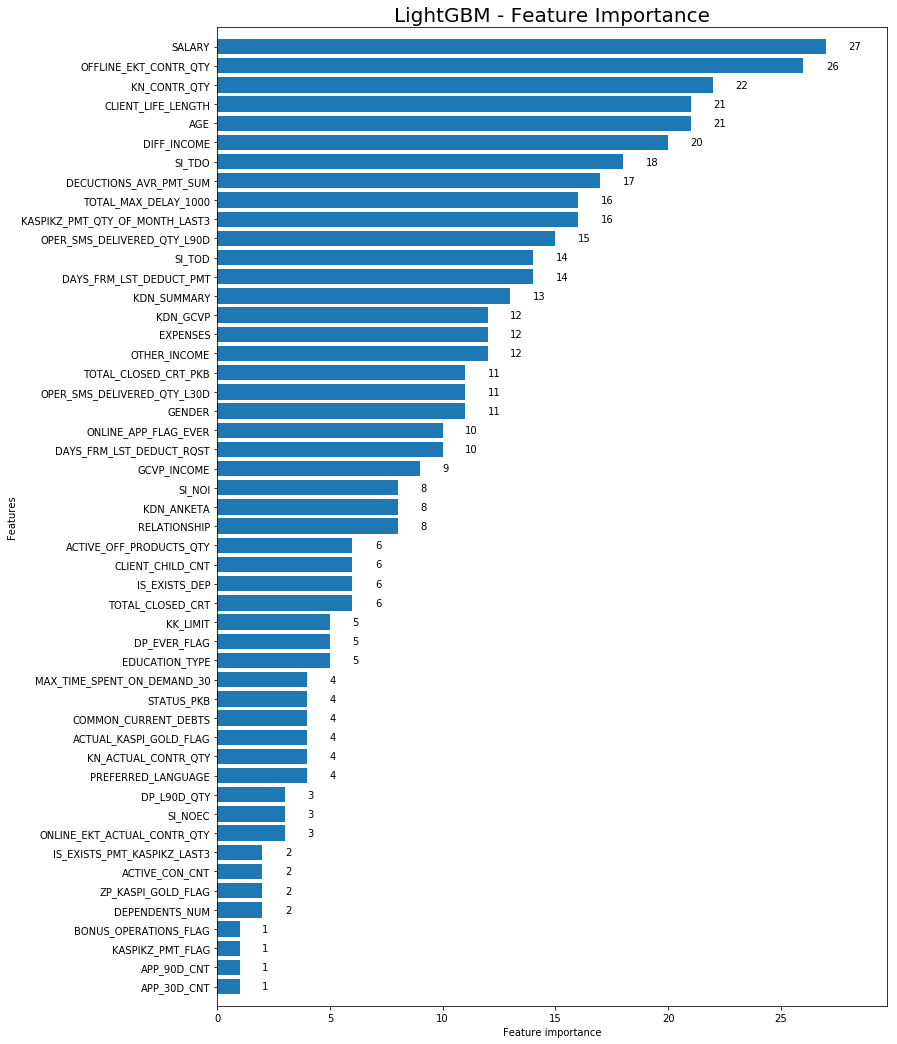

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=20)
plt.show()

In [96]:
y_predicted = model.predict(X_valid)
sum=0
for i in train_predicted:
    sum+=i
print('sum', sum)
print(X_valid.shape[0])
print('sum true:', y_valid.sum())
y_predicted_proba = model.predict_proba(X_valid)


sum 211
9341
sum true: 1370


/home/ligayv/.virtualenvs/gstore-Kw5slCY8/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0.52869402, 0.35693147, 0.38291105, ..., 0.45753017, 0.50038746,
       0.38930936])

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
confusion_matrix(y_valid, y_predicted)

array([[7050,  921],
       [1126,  244]])

In [97]:
print('f1',f1_score(y_valid, y_predicted, average='macro'))
print('roc_auc_score', roc_auc_score(y_valid, y_predicted_proba[:,1]))

f1 0.5328660779189813
roc_auc_score 0.6035034390175334
